### SUPSMU

$\hat{f_n}^{(s)}$ - linear estimator based on neigbourhoods of the point $s \in (0,1]$

$\sum^n_{i=1} (Y_i - \hat{f}^{(s)}_{(-1)}(X_{i}))^2 \to \min_{s \in S}$

$S =\{ 0.05, 0.2, 0.5\}$ - tweetwer, midrange, woofer



In [1]:
x  <-  cars$speed
y   <-  cars$dist

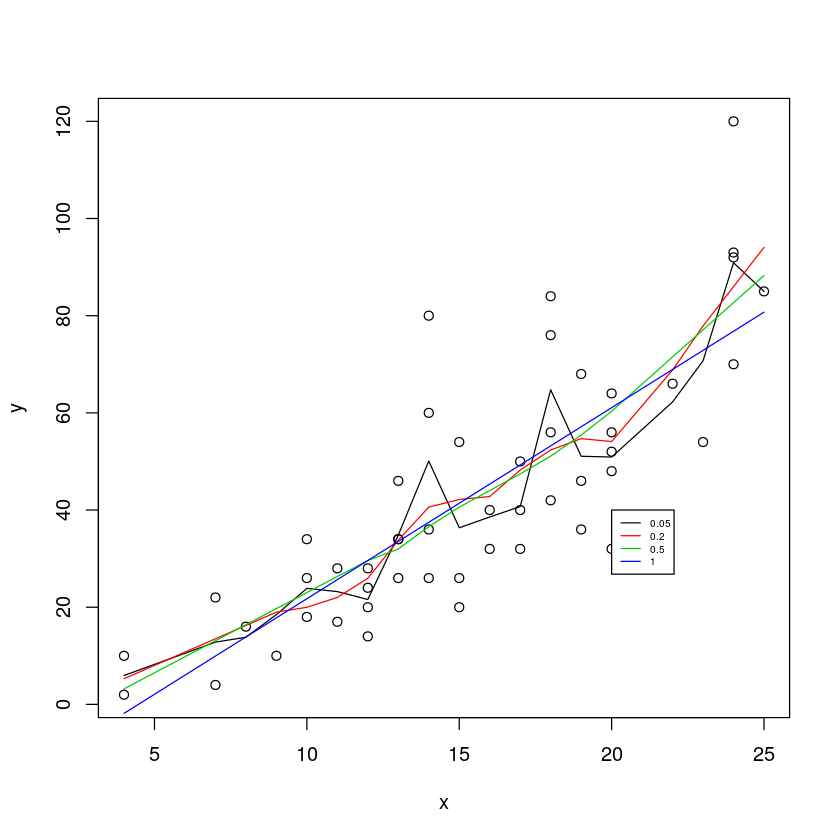

In [2]:
plot(x,y)
spanvec = c(0.05,0.2,0.5,1)
for (j in (1:4)){
    lines(supsmu(x,y, span=spanvec[j]), col=j)
}
legend(20,40,legend=spanvec, col=seq(spanvec), lty=1, cex=0.5)

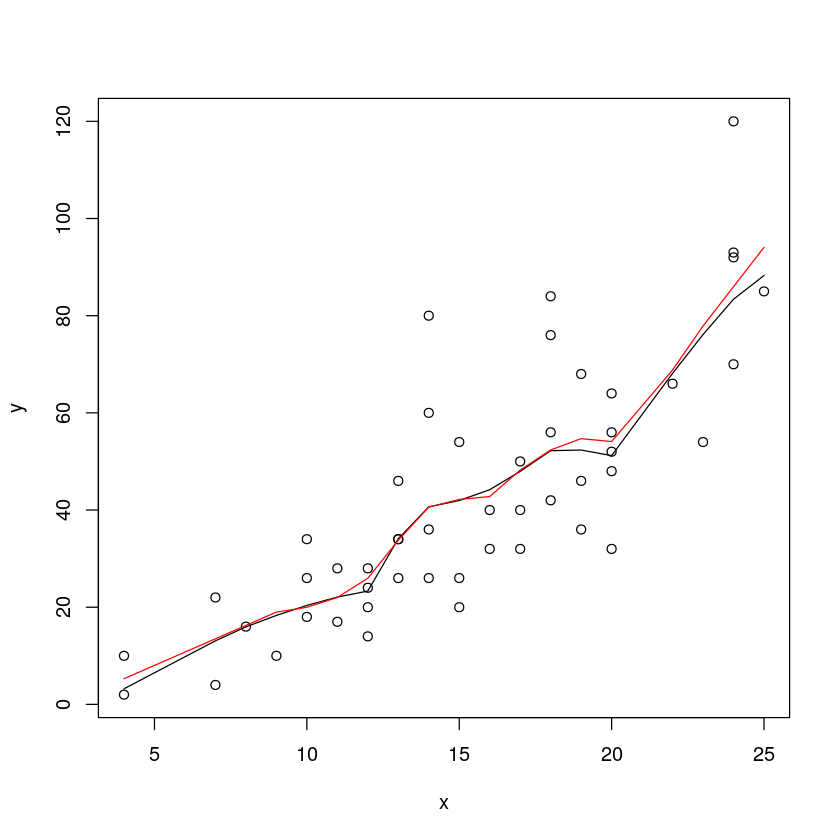

In [3]:
plot(x,y)
lines(supsmu(x,y,span='cv'))
lines(supsmu(x,y,span=0.2), col='red')

#### BASS parameter

$x_i: s^{(i)}_{CV}, e^{(i)}_{CV} = (Y_i-\hat{f}^{(s^{(i)}_{CV})}_{(-1)}(X_{i}))^e$

$e^{(i)}_{W} = (Y_i-\hat{f}^{(0.5)}_{(-1)}(X_{i}))^2$

$s^{(i)} = s^{(i)}_{cv} + (0.5-s^{(i)}_{cv}) (\dfrac{e_{cv}^{(i)}}{e_{w}^{(i)}})^{10-\alpha}$

where $\alpha = \{1,2,..,10\} $ - bass parameter

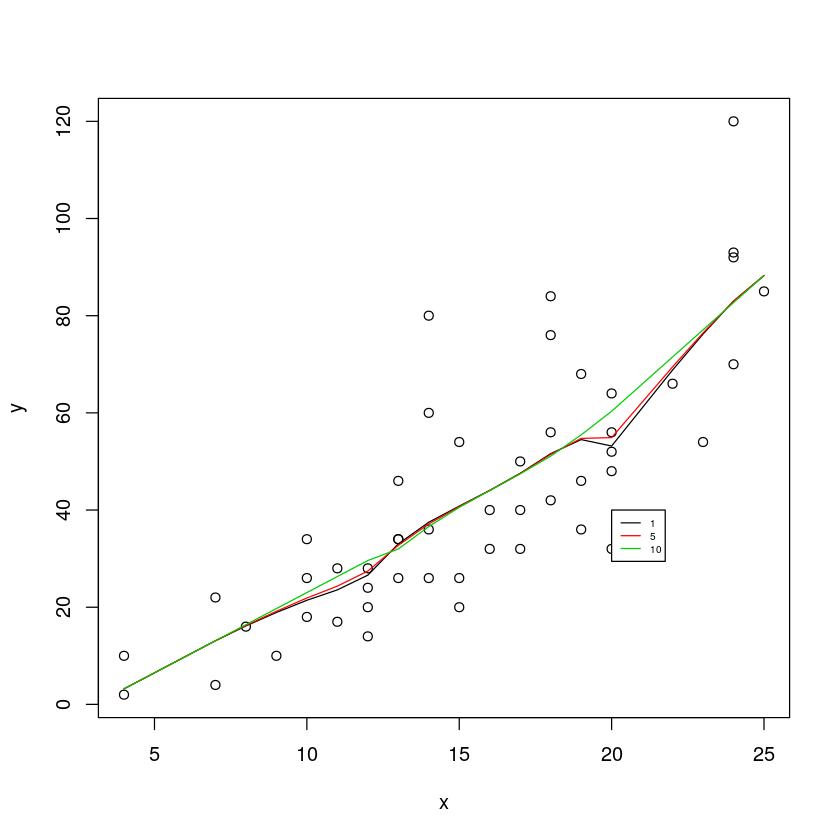

In [11]:
bassvec = c(1,5,10)
plot(x,y)
for (j in (1:3)){
    lines(supsmu(x,y, bass=bassvec[j]), col=j)
}
legend(20,40,legend=bassvec, col=seq(bassvec), lty=1, cex=0.5)

### LOESS

LOESS (local regression) = LOWESS (locally weighted scatter plot smoothing)


Clevland (1979):

at the vicinity of $x_i: f(x) = \beta_0^{(i)}  + \beta_1^{(i)} x $

$\sum^n_{j=1} w_i(x_j) (Y_j - \beta_0^{(i)}  + \beta_1^{(i)} x  )^2$


Tricube function 

$$K(x) = \begin{cases} (1-|x|^3)^3, |x|<1 \\ 0, |x| \geq 1 \end{cases}$$

$w_i(X_j) = 1/h K(\dfrac{X_j-X_i}{h})$, $h$ - bandwidth

Algorithm:

1. $w_i(X_j)$
2. (*) $\to \beta_0^{(i)},  \beta_1^{(i)} $
3. $e_i = Y_j - \beta_0^{(i)}  + \beta_1^{(i)} X_i $
4. $w_i(X_j)  \to \delta_j w_i(X_j)  $

Bicube finction
$$B(x) = \begin{cases} (1-x^2)^2, |x|<1 \\ 0, |x| \geq 1 \end{cases}$$


$\delta_j = B(\dfrac{e_j}{6 Med(e_1, ..., e_n) })$



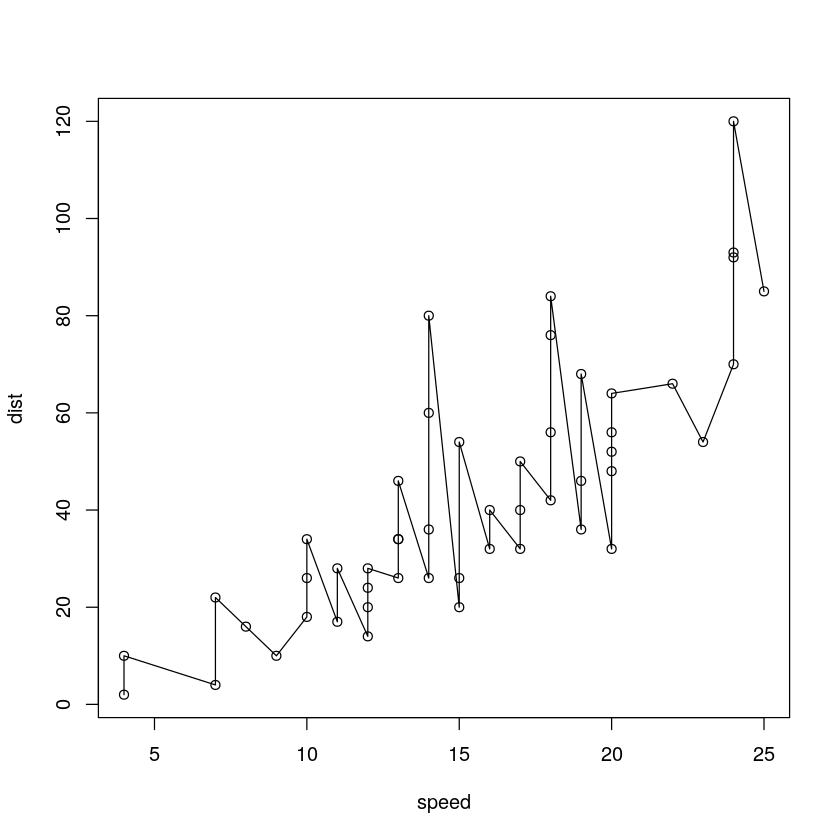

In [4]:
L = loess(dist~speed,cars)
plot(cars)
lines(L)

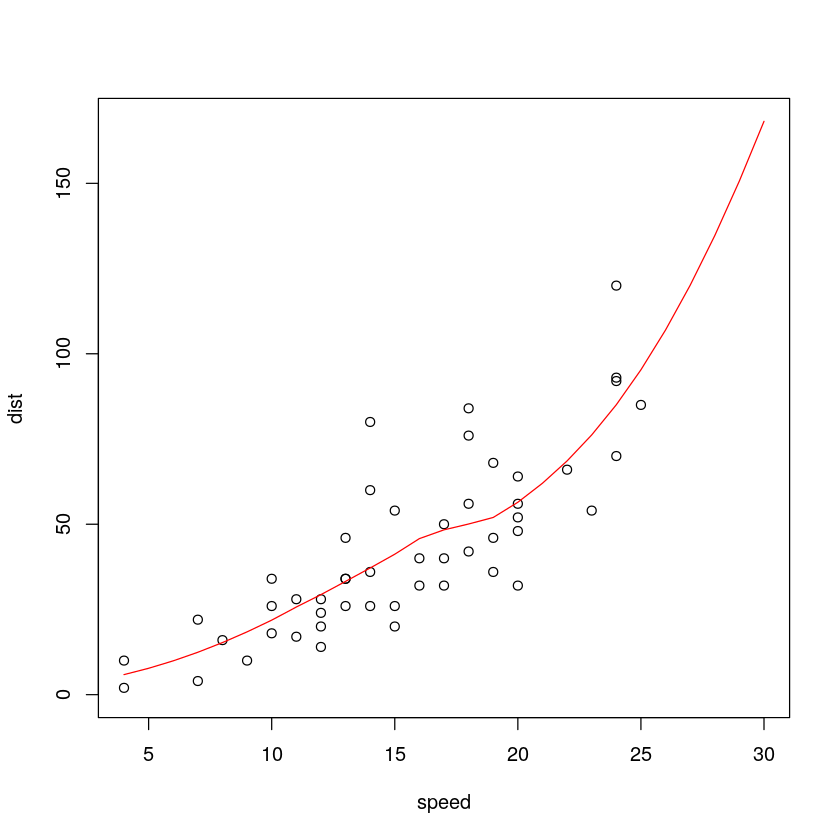

In [6]:
L = loess(dist~speed,cars, control=loess.control(surface='direct'))
s1= seq(4,30,1)
p = predict(L, data.frame(speed = s1), se=T)
plot(cars, xlim=c(4,30), ylim=c(0,max(p$fit)))
lines(s1,p$fit,col='red')

In [7]:
install.packages('fANCOVA')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [8]:
library('fANCOVA')

fANCOVA 0.5-1 loaded


Call:
loess(formula = y ~ x, data = data.bind, span = span1, degree = degree, 
    family = family)

Number of Observations: 50 
Equivalent Number of Parameters: 2.81 
Residual Standard Error: 15.29 

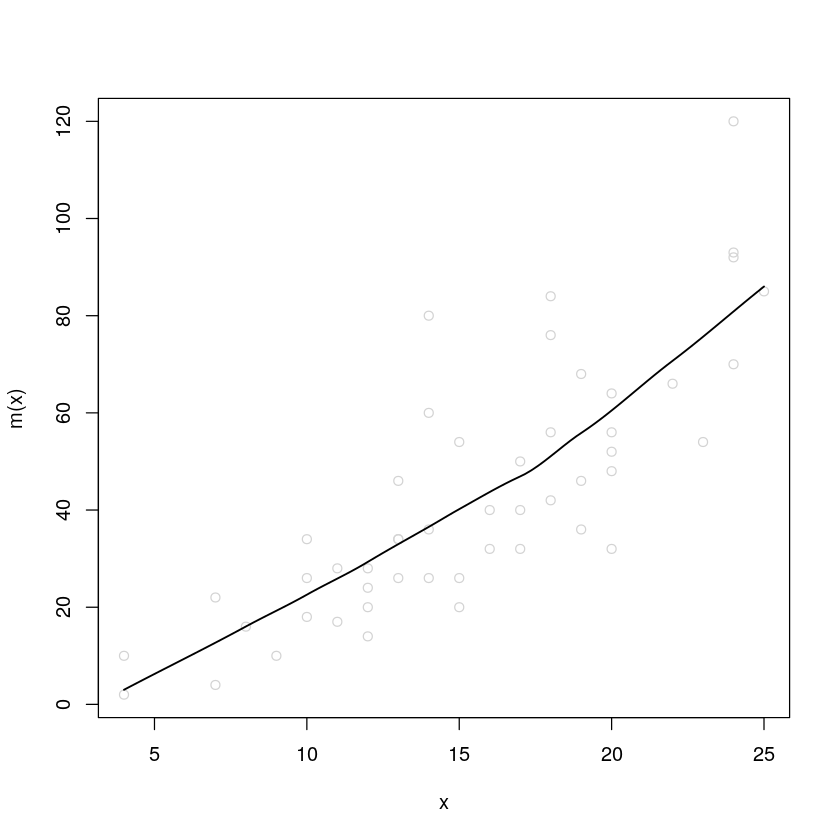

In [10]:
loess.as(x,y,plot=T)

Call:
loess(formula = y ~ x, data = data.bind, span = span1, degree = degree, 
    family = family)

Number of Observations: 50 
Equivalent Number of Parameters: 5.06 
Residual Standard Error: 14.93 

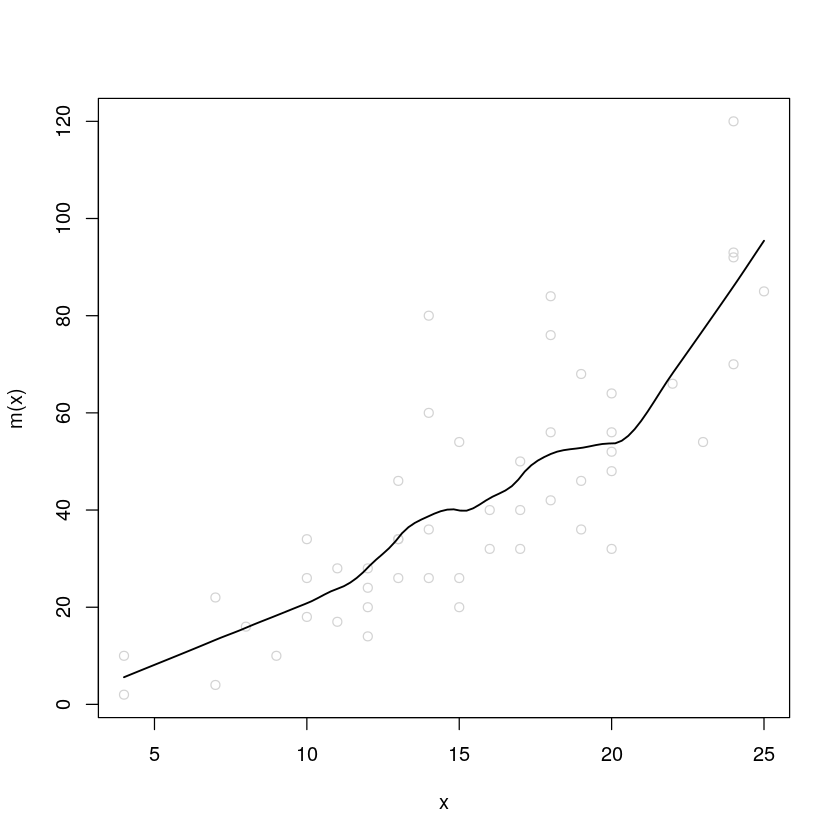

In [11]:
loess.as(x,y,criterion = 'gcv', plot=T)

Call:
loess(formula = y ~ x, data = data.bind, span = span1, degree = degree, 
    family = family)

Number of Observations: 50 
Equivalent Number of Parameters: 2.81 
Residual Standard Error: 15.29 

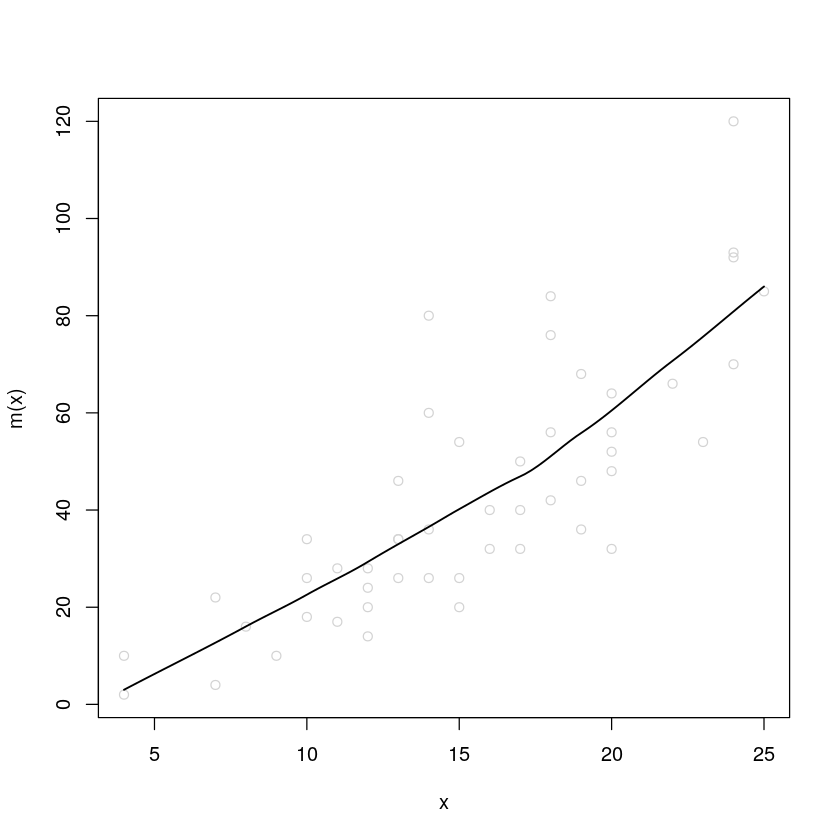

In [12]:
loess.as(x,y,criterion = 'aicc', plot=T)

[1]  5.59198  8.13851 10.67965 13.27404 15.76402 18.29040 20.80775 23.78363
 [9] 28.15286 34.29082 38.74037 39.92998 42.43587 46.75355 51.52819 52.78334
[17] 53.68196 58.60833 68.14226 77.03391 86.04332 95.42052       NA       NA
[25]       NA       NA       NA

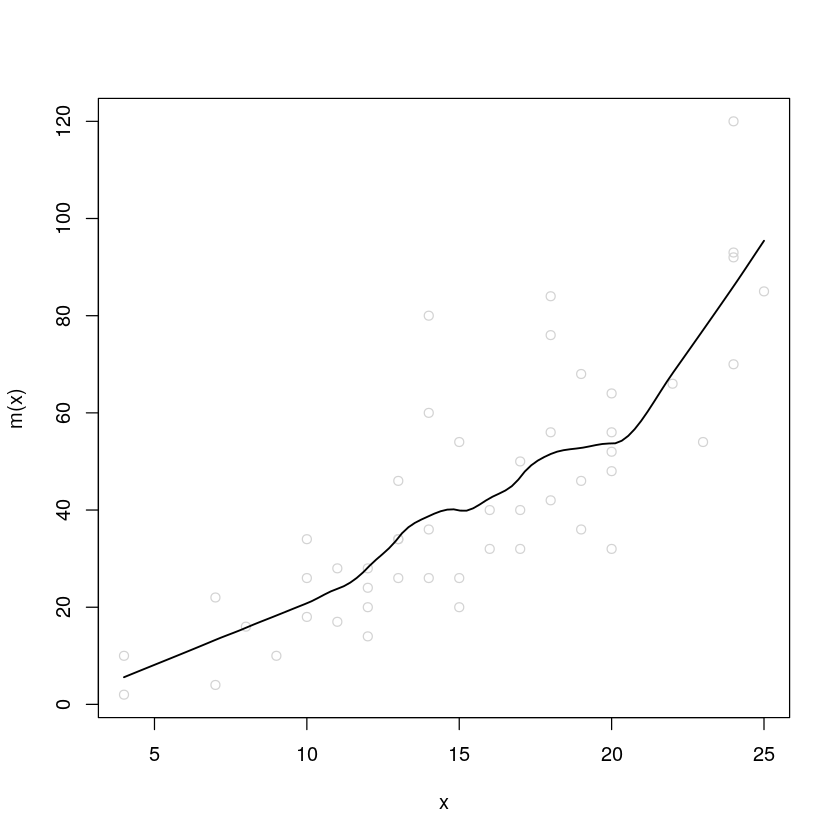

In [13]:
L1 = loess.as(x,y,criterion = 'gcv', plot=T)
predict(L1,s1)

#### Multidimentional 

In [15]:
N = 1000
xi1 = runif(N,min=0,max=3)
xi2 = runif(N,min=0,max=3)
eps = rnorm(N,sd=0.5)
y = sin(2*xi1) + sin(2*xi2) + eps

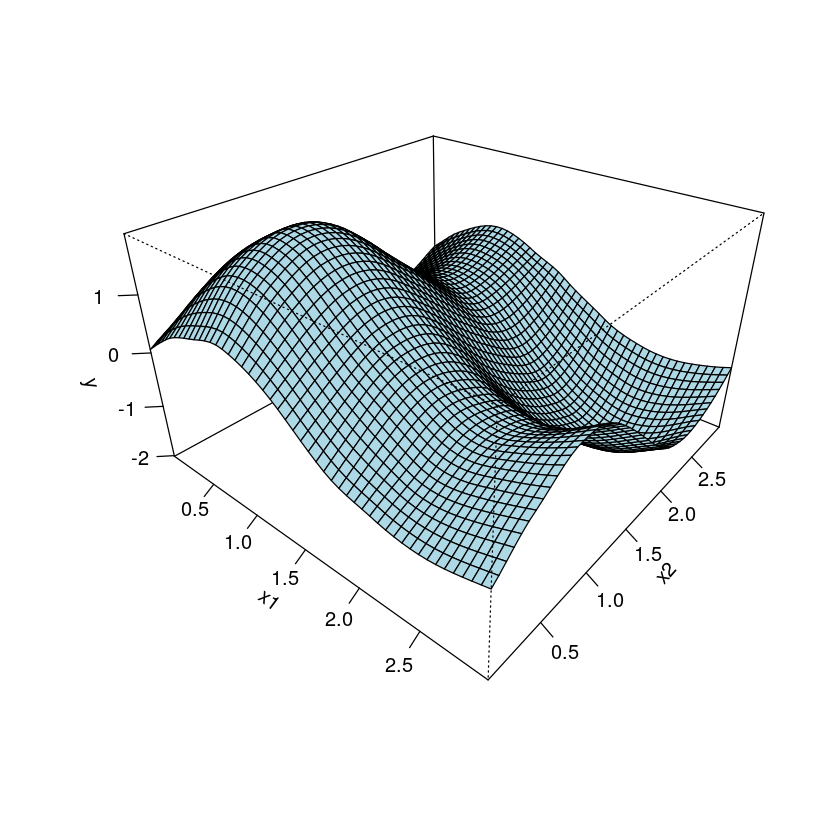

In [29]:
L = loess.as(cbind(xi1,xi2), y, plot=T)

In [19]:
L2 = lm(y~xi1+xi2)

In [18]:
install.packages('scatterplot3d')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [21]:
library('scatterplot3d')

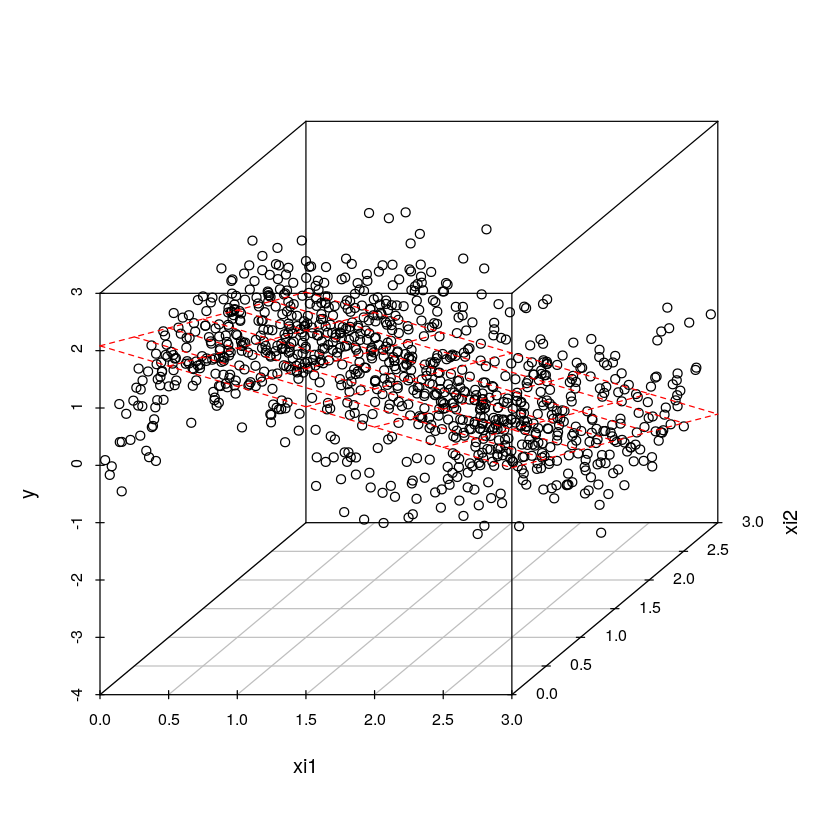

In [26]:
sc=scatterplot3d(xi1,xi2, y, angle =45)
sc$plane3d(L2,col='red')

In [30]:
mean((L$fitted-y)^2)
mean((L2$fitted.values-y)^2)

[1] 0.2464204

[1] 0.6301093